In [345]:
import pandas as pd
import numpy as np

In [346]:
import re

In [347]:
import matplotlib.pyplot as plt

In [348]:
limpeza = pd.read_csv('vendas_modificado.csv')

In [349]:
limpeza.head()


,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
0,13679,3/20/2021,23:35:51,LUCAS Araujo Kuhn,Queijo Mussarela,"R$ 16,87",13,239.31,Pagamento Confirmado,Niterói,RJ,Brasil,24000-000,20.0,Cartão de Crédito,SAMUEL HENRIQUE CAÇADOR,Porto Alegre
1,28070,10/30/2020,9:00:53,MICAEL SOUZA RONCETE,Molho de Tomate,"R$ 3,25",3,9.75,Pagamento Confirmado,Mariana,MG,Brasil,35420-000,0.0,Pix,MICAEL MALAQUIAS DE SOUZA OLIVEIRA,Fugini
2,47484,6/9/2021,15:30:28,FELIPE AUGUSTO NERY SILVA,Água Mineral,"R$ 1,63",9,36.67,Pagamento Confirmado,Cabo Frio,RJ,Brasil,28900-000,22.0,Transferência Bancária,HENRICO MATOS LIMA DA CUNHA,Minalba
3,20809,6/4/2022,8:41:23,LEVI RIBEIRO AMORIM,Carvão,"R$ 8,74",4,54.96,Em Separação,Campos dos Goytacazes,RJ,Brasil,28000-000,20.0,Pix,GABRIEL QUEIROZ DE AGUIAR,Marca-Brás
4,47123,5/4/2019,13:38:45,GABRIEL MATOS LIMA DA CUNHA,Café,"R$ 9,48",2,18.96,Em Separação,Conselheiro Lafaiete,MG,Brasil,36400-000,0.0,Cartão de Crédito,HENRICO MATOS LIMA DA CUNHA,3 Corações


In [350]:
print(limpeza.dtypes)

id_da_compra      int64
data             object
hora             object
cliente          object
produto          object
valor            object
quantidade        int64
total           float64
status           object
cidade           object
estado           object
pais             object
cep              object
frete           float64
pagamento        object
vendedor         object
marca            object
dtype: object


TRATAMENTO DE DADOS DUPLICADOS

In [351]:
duplicatas = limpeza[limpeza.duplicated()]
print(duplicatas)

        id_da_compra        data      hora  \
9451           37102    8/2/2020  10:32:27   
11787          43901   7/20/2019  13:10:10   
13994           5337   5/24/2020  12:10:42   
14387           2852   8/26/2018  17:38:01   
14990          40818   3/31/2019  20:04:56   
...              ...         ...       ...   
368476         47230   6/22/2019  16:18:20   
368503         50402   6/25/2022   8:13:33   
368603         31673  12/31/2020  19:24:49   
368628         14688    1/6/2019  18:01:24   
368715         44677   4/22/2019   6:58:43   

                                   cliente         produto     valor  \
9451                 JOÃO SILVINO DA SILVA         Shampoo   R$ 7,65   
11787               KALLEBE RIBEIRO AMORIM    Desinfetante   R$ 5,97   
13994              GABRIEL VIEIRA DEMARQUE    Desinfetante   R$ 6,34   
14387           MICAEL SEGURASSE GONÇALVES           Vinho  R$ 32,69   
14990      TIAGO ANTÔNIO DE DECCO OLIVEIRA          Açúcar   R$ 2,99   
...            

In [352]:
# Remover duplicatas por colunas
limpeza = limpeza.drop_duplicates()

In [353]:
duplicatas = limpeza[limpeza.duplicated()]
print(duplicatas)

Empty DataFrame
Columns: [id_da_compra, data, hora, cliente, produto, valor, quantidade, total, status, cidade, estado, pais, cep, frete, pagamento, vendedor, marca]
Index: []


COMPATIBILIDADE DA FORMAÇÃO DE DATA E HORA

In [354]:
limpeza['data'] = pd.to_datetime(limpeza['data'], errors='coerce').dt.strftime('%Y-%m-%d')

In [355]:
limpeza['hora'] = pd.to_datetime(limpeza['hora'], format='%H:%M:%S', errors='coerce').dt.strftime('%H:%M:%S')

In [356]:
print(limpeza[['data', 'hora']].head())

         data      hora
0  2021-03-20  23:35:51
1  2020-10-30  09:00:53
2  2021-06-09  15:30:28
3  2022-06-04  08:41:23
4  2019-05-04  13:38:45


TRATAMENTO DE DADOS INCONSISTENTES

In [357]:
print(limpeza[['produto']].head())

            produto
0  Queijo Mussarela
1   Molho de Tomate
2      Água Mineral
3            Carvão
4              Café


In [358]:
# Remover caracteres especiais da coluna 'produto'
limpeza['produto'] = limpeza['produto'].astype(str).apply(
    lambda x: re.sub(r'[^A-Za-z0-9À-ÿ\s]', '', x)
)

In [359]:
print(limpeza[['produto']].head())

            produto
0  Queijo Mussarela
1   Molho de Tomate
2      Água Mineral
3            Carvão
4              Café


VALORES NUMÉRICOS

In [360]:
# Convertendo colunas para formato numérico
colunas_numericas = ['quantidade', 'total', 'frete']

for coluna in colunas_numericas:
    limpeza[coluna] = pd.to_numeric(limpeza[coluna], errors='coerce')

print(limpeza.dtypes)

id_da_compra      int64
data             object
hora             object
cliente          object
produto          object
valor            object
quantidade        int64
total           float64
status           object
cidade           object
estado           object
pais             object
cep              object
frete           float64
pagamento        object
vendedor         object
marca            object
dtype: object


In [361]:
limpeza.to_csv('vendasEmCorreção.csv', index=False)

TRATAMENTO DO VENDEDOR

In [362]:
limpeza[limpeza.vendedor.isnull()].head(6)

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
112,52388,2018-07-30,07:10:51,MIGUEL ANTÔNIO DE DECCO OLIVEIRA,Manteiga,"R$ 8,77",5,56.85,Pagamento Confirmado,Juiz de Fora,MG,Brasil,36000-000,13.0,Cartão de Crédito,NaN,Aviação
425,46034,2019-12-28,14:14:40,RAFAEL HENRIQUE COSTA BARNABE MARAZO,Suco de Laranja,"R$ 825,3",5,31.50,Aguardando Pagamento,Leopoldina,MG,Brasil,367XXXXX,0.0,Boleto,NaN,Prats
525,30444,2022-09-11,21:39:42,LUCAS GONÇALVES DONADONI,Café,"R$ 10,33",2,20.66,Em Separação,Niterói,RJ,Brasil,24000-000,0.0,Transferência Bancária,NaN,3 Corações
543,41142,2020-10-16,12:47:08,GABRIEL CARLOS DE SOUZA,Vinho,"R$ 28,89",1,28.89,Pagamento Confirmado,Coronel Xavier Chaves,MG,Brasil,36330-000,0.0,Cartão de Crédito,NaN,Miolo
544,194,2020-06-28,12:28:55,MATEUS Araujo Kuhn,Suco de Laranja,"R$ 6,86",6,51.16,Em Separação,Lima Duarte,MG,Brasil,36140-000,10.0,Pix,NaN,Prats
623,55288,2020-05-08,14:08:29,SAMUEL HENRIQUE CAÇADOR,Queijo Mussarela,"R$ 17,69",1,17.69,Entregue,Niterói,RJ,Brasil,24000-000,0.0,Transferência Bancária,NaN,Quatá


In [363]:
limpeza['vendedor'] = limpeza['vendedor'].fillna('DESCONHECIDO')

In [364]:
limpeza.head(6)

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
0,13679,2021-03-20,23:35:51,LUCAS Araujo Kuhn,Queijo Mussarela,"R$ 16,87",13,239.31,Pagamento Confirmado,Niterói,RJ,Brasil,24000-000,20.0,Cartão de Crédito,SAMUEL HENRIQUE CAÇADOR,Porto Alegre
1,28070,2020-10-30,09:00:53,MICAEL SOUZA RONCETE,Molho de Tomate,"R$ 3,25",3,9.75,Pagamento Confirmado,Mariana,MG,Brasil,35420-000,0.0,Pix,MICAEL MALAQUIAS DE SOUZA OLIVEIRA,Fugini
2,47484,2021-06-09,15:30:28,FELIPE AUGUSTO NERY SILVA,Água Mineral,"R$ 1,63",9,36.67,Pagamento Confirmado,Cabo Frio,RJ,Brasil,28900-000,22.0,Transferência Bancária,HENRICO MATOS LIMA DA CUNHA,Minalba
3,20809,2022-06-04,08:41:23,LEVI RIBEIRO AMORIM,Carvão,"R$ 8,74",4,54.96,Em Separação,Campos dos Goytacazes,RJ,Brasil,28000-000,20.0,Pix,GABRIEL QUEIROZ DE AGUIAR,Marca-Brás
4,47123,2019-05-04,13:38:45,GABRIEL MATOS LIMA DA CUNHA,Café,"R$ 9,48",2,18.96,Em Separação,Conselheiro Lafaiete,MG,Brasil,36400-000,0.0,Cartão de Crédito,HENRICO MATOS LIMA DA CUNHA,3 Corações
5,38623,2018-02-19,17:32:01,LUCAS ANTÔNIO DE SOUZA NETO,Café,"R$ 10,16",1,20.16,Entregue com Sucesso,Resende Costa,MG,Brasil,36340-000,10.0,Transferência Bancária,VICTOR GONÇALVES DONADONI,3 Corações


VALORES AUSENTES

In [365]:
print(limpeza.isnull().sum())

id_da_compra       0
data               0
hora               0
cliente            0
produto            0
valor              0
quantidade         0
total           3634
status             0
cidade             0
estado             0
pais               0
cep                0
frete           7270
pagamento          0
vendedor           0
marca              0
dtype: int64


TRATAMENTO DE VALOR

In [366]:
limpeza['valor'] = limpeza['valor'].str.replace(r'R\$', '', regex=True).str.strip()

In [367]:
limpeza.head(3)

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
0,13679,2021-03-20,23:35:51,LUCAS Araujo Kuhn,Queijo Mussarela,"16,87",13,239.31,Pagamento Confirmado,Niterói,RJ,Brasil,24000-000,20.0,Cartão de Crédito,SAMUEL HENRIQUE CAÇADOR,Porto Alegre
1,28070,2020-10-30,09:00:53,MICAEL SOUZA RONCETE,Molho de Tomate,"3,25",3,9.75,Pagamento Confirmado,Mariana,MG,Brasil,35420-000,0.0,Pix,MICAEL MALAQUIAS DE SOUZA OLIVEIRA,Fugini
2,47484,2021-06-09,15:30:28,FELIPE AUGUSTO NERY SILVA,Água Mineral,"1,63",9,36.67,Pagamento Confirmado,Cabo Frio,RJ,Brasil,28900-000,22.0,Transferência Bancária,HENRICO MATOS LIMA DA CUNHA,Minalba


TRATAMENTO DO FRETE

In [368]:
limpeza['Frete_Check1'] = limpeza.groupby(['cidade', 'estado'])['frete'].transform('median')

In [369]:
limpeza.head(3)

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca,Frete_Check1
0,13679,2021-03-20,23:35:51,LUCAS Araujo Kuhn,Queijo Mussarela,"16,87",13,239.31,Pagamento Confirmado,Niterói,RJ,Brasil,24000-000,20.0,Cartão de Crédito,SAMUEL HENRIQUE CAÇADOR,Porto Alegre,0.0
1,28070,2020-10-30,09:00:53,MICAEL SOUZA RONCETE,Molho de Tomate,"3,25",3,9.75,Pagamento Confirmado,Mariana,MG,Brasil,35420-000,0.0,Pix,MICAEL MALAQUIAS DE SOUZA OLIVEIRA,Fugini,0.0
2,47484,2021-06-09,15:30:28,FELIPE AUGUSTO NERY SILVA,Água Mineral,"1,63",9,36.67,Pagamento Confirmado,Cabo Frio,RJ,Brasil,28900-000,22.0,Transferência Bancária,HENRICO MATOS LIMA DA CUNHA,Minalba,22.0


In [370]:
limpeza['Frete_Check2'] = limpeza.frete.fillna(limpeza.groupby (['cidade', 'estado'])['frete'].transform('median'))

In [371]:
limpeza.head(3)

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca,Frete_Check1,Frete_Check2
0,13679,2021-03-20,23:35:51,LUCAS Araujo Kuhn,Queijo Mussarela,"16,87",13,239.31,Pagamento Confirmado,Niterói,RJ,Brasil,24000-000,20.0,Cartão de Crédito,SAMUEL HENRIQUE CAÇADOR,Porto Alegre,0.0,20.0
1,28070,2020-10-30,09:00:53,MICAEL SOUZA RONCETE,Molho de Tomate,"3,25",3,9.75,Pagamento Confirmado,Mariana,MG,Brasil,35420-000,0.0,Pix,MICAEL MALAQUIAS DE SOUZA OLIVEIRA,Fugini,0.0,0.0
2,47484,2021-06-09,15:30:28,FELIPE AUGUSTO NERY SILVA,Água Mineral,"1,63",9,36.67,Pagamento Confirmado,Cabo Frio,RJ,Brasil,28900-000,22.0,Transferência Bancária,HENRICO MATOS LIMA DA CUNHA,Minalba,22.0,22.0


In [372]:
limpeza['frete'] =   limpeza.frete.fillna(limpeza.groupby (['cidade', 'estado'])['frete'].transform('median'))

In [373]:
limpeza = limpeza.drop(columns=['Frete_Check1', 'Frete_Check2'])

In [374]:
limpeza.head(3)

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
0,13679,2021-03-20,23:35:51,LUCAS Araujo Kuhn,Queijo Mussarela,"16,87",13,239.31,Pagamento Confirmado,Niterói,RJ,Brasil,24000-000,20.0,Cartão de Crédito,SAMUEL HENRIQUE CAÇADOR,Porto Alegre
1,28070,2020-10-30,09:00:53,MICAEL SOUZA RONCETE,Molho de Tomate,"3,25",3,9.75,Pagamento Confirmado,Mariana,MG,Brasil,35420-000,0.0,Pix,MICAEL MALAQUIAS DE SOUZA OLIVEIRA,Fugini
2,47484,2021-06-09,15:30:28,FELIPE AUGUSTO NERY SILVA,Água Mineral,"1,63",9,36.67,Pagamento Confirmado,Cabo Frio,RJ,Brasil,28900-000,22.0,Transferência Bancária,HENRICO MATOS LIMA DA CUNHA,Minalba


In [375]:
print(limpeza.isnull().sum())

id_da_compra       0
data               0
hora               0
cliente            0
produto            0
valor              0
quantidade         0
total           3634
status             0
cidade             0
estado             0
pais               0
cep                0
frete              0
pagamento          0
vendedor           0
marca              0
dtype: int64


VERIFICAÇÃO DO VALOR TOTAL

In [376]:
def valorCorrigido(valor):
    match = re.search(r'\d{1,3}(,\d{2})?', str(valor))  
    if match:
        return match.group().replace(',', '.')
    return np.nan

limpeza['valor'] = limpeza['valor'].apply(valorCorrigido).astype(float)

In [377]:
limpeza['total_calculado'] = limpeza['valor'] * limpeza['quantidade'] + limpeza['frete']

In [378]:
limpeza[limpeza.total.isnull()].head(6)

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca,total_calculado
320,15092,2018-03-30,21:29:12,GUILHERME HUGO CAZULA PEREIRA,Feijão,10.19,2,NaN,Em Separação,Itaboraí,RJ,Brasil,24800-000,0.0,Cartão de Crédito,GABRIEL QUEIROZ DE AGUIAR,Caldo Bom,20.38
410,33369,2020-08-21,09:10:58,GABRIEL PAULO ALVES ALVIM,Refrigerante,6.21,2,NaN,Em Transporte,Angra dos Reis,RJ,Brasil,23900-000,0.0,Transferência Bancária,HENRICO MATOS LIMA DA CUNHA,Coca-Cola,12.42
448,28894,2022-01-09,15:55:37,THIAGO HENRIQUE CAÇADOR,Macarrão,2.49,14,NaN,Em Transporte,Cataguases,MG,Brasil,36770-000,0.0,Pix,LUCAS VITOR FAÇANHA NEVES,Renata,34.86
561,15983,2022-10-26,17:31:51,LUCAS RISSON EUZEBIO,Café,8.01,6,NaN,Em Separação,Astolfo Dutra,MG,Brasil,36780-000,0.0,Transferência Bancária,VICTOR GONÇALVES DONADONI,3 Corações,48.06
565,38996,2022-10-15,14:36:22,THIAGO CARDOSO DINIZ,Café,12.13,2,NaN,Pagamento Confirmado,São Bernardo do Campo,SP,Brasil,09700-000,0.0,Cartão de Crédito,MICAEL MALAQUIAS DE SOUZA OLIVEIRA,Melitta,24.26
580,21272,2020-09-05,10:45:01,PAULO SEGURASSE GONÇALVES,Sabonete,2.55,7,NaN,PC,Simão Pereira,MG,Brasil,36123-000,9.5,Cartão de Crédito,PAULO SOUZA RONCETE,Nivea,27.35


In [379]:
limpeza['total'] = np.where(
    np.abs(limpeza['total'] - limpeza['total_calculado']) < 0.01,
    limpeza['total'],
    limpeza['total_calculado']
)

In [380]:
limpeza.drop(columns=['total_calculado'], inplace=True)

In [381]:
limpeza.head(6)

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
0,13679,2021-03-20,23:35:51,LUCAS Araujo Kuhn,Queijo Mussarela,16.87,13,239.31,Pagamento Confirmado,Niterói,RJ,Brasil,24000-000,20.0,Cartão de Crédito,SAMUEL HENRIQUE CAÇADOR,Porto Alegre
1,28070,2020-10-30,09:00:53,MICAEL SOUZA RONCETE,Molho de Tomate,3.25,3,9.75,Pagamento Confirmado,Mariana,MG,Brasil,35420-000,0.0,Pix,MICAEL MALAQUIAS DE SOUZA OLIVEIRA,Fugini
2,47484,2021-06-09,15:30:28,FELIPE AUGUSTO NERY SILVA,Água Mineral,1.63,9,36.67,Pagamento Confirmado,Cabo Frio,RJ,Brasil,28900-000,22.0,Transferência Bancária,HENRICO MATOS LIMA DA CUNHA,Minalba
3,20809,2022-06-04,08:41:23,LEVI RIBEIRO AMORIM,Carvão,8.74,4,54.96,Em Separação,Campos dos Goytacazes,RJ,Brasil,28000-000,20.0,Pix,GABRIEL QUEIROZ DE AGUIAR,Marca-Brás
4,47123,2019-05-04,13:38:45,GABRIEL MATOS LIMA DA CUNHA,Café,9.48,2,18.96,Em Separação,Conselheiro Lafaiete,MG,Brasil,36400-000,0.0,Cartão de Crédito,HENRICO MATOS LIMA DA CUNHA,3 Corações
5,38623,2018-02-19,17:32:01,LUCAS ANTÔNIO DE SOUZA NETO,Café,10.16,1,20.16,Entregue com Sucesso,Resende Costa,MG,Brasil,36340-000,10.0,Transferência Bancária,VICTOR GONÇALVES DONADONI,3 Corações


In [382]:
print(limpeza.isnull().sum())

id_da_compra    0
data            0
hora            0
cliente         0
produto         0
valor           0
quantidade      0
total           0
status          0
cidade          0
estado          0
pais            0
cep             0
frete           0
pagamento       0
vendedor        0
marca           0
dtype: int64


CORREÇÃO DOS ESTADOS


In [383]:
estado_correto = {
    'São Paulo': 'SP',
    'MTSa': 'MT',
    'PSC': 'SC'
}
limpeza['estado'] = limpeza['estado'].replace(estado_correto)

STATUS INVÁLIDOS

In [384]:
status_correto = {
    'PC': 'Pagamento Confirmado',
    'Pgto Confirmado': 'Pagamento Confirmado',
    'AP': 'Aguardando Pagamento',
    'Aguardando Pgto': 'Aguardando Pagamento',
    'aguardando pagamento': 'Aguardando Pagamento',
    'Sep': 'Em Separação',
    'Separando': 'Em Separação',
    'Transp': 'Em Transporte',
    'Transportando': 'Em Transporte',
    'Entg': 'Entregue com Sucesso',
    'Entregue': 'Entregue com Sucesso'
}
limpeza['status'] = limpeza['status'].replace(status_correto)

REMOÇÃO DE ESPAÇOS EXTRAS EM COLUNAS

In [385]:
for col in limpeza.select_dtypes(include='object').columns:
    limpeza[col] = limpeza[col].str.strip()

TRATAMENTO DE CEPs

In [386]:
limpeza = limpeza[limpeza['cep'].astype(str).str.match(r'^\d{5}-\d{3}$')]

PADRONIZAÇÃO DOS PRODUTOS

In [387]:
correcoes_produtos = {
 'Qbeijo Mussarela': 'Queijo Mussarela',
 'Queijo Mussarelz': 'Queijo Mussarela',
 'Mopho de Tomate': 'Molho de Tomate',
 'Molmo de Tomate': 'Molho de Tomate',
 'Água Mineras': 'Água Mineral',
 'Água Minera': 'Água Mineral',
 'Clfé': 'Café',
 'Cnfé': 'Café',
 'Caft': 'Café',
 'Caff': 'Café',
 'Cafc': 'Café',
 'ieijão': 'Feijão',
 'Scl': 'Sal',
 'tal': 'Sal',
 'Sabonepe': 'Sabonete',
 'Refrigkrante': 'Refrigerante',
 'Papel qoalha': 'Papel Toalha',
 'Papel Twalha': 'Papel Toalha',
 'Desinfetanue': 'Desinfetante',
 'Desinfekante': 'Desinfetante',
 'Presuntd': 'Presunto',
 'Sucoyde Laranja': 'Suco de Laranja',
 'Manteigt': 'Manteiga',
 'Mqcarrão': 'Macirrão',
 'Condicioiador': 'Condicionador',
 'Condibionador': 'Condicionador',
 'Sabonepe': 'Sabonete',
 'Macirrão': 'Macarrão',
 'Mqcarrão': 'Macarrão',
 'Macawrão': 'Macarrão',
 'Majarrão': 'Macarrão',
 'Farinha de Tripo': 'Farinha de Trigo',
 'Açúcaz': 'Açúcar',
 'zabonete': 'Sabonete',
 'Arroc': 'Arroz',
 'Amaciayte': 'Amaciante',
 'Biscoitq Recheado': 'Biscoito Recheado',
 'Deqergente': 'Detergente',
 'Deterwente': 'Detergente',
 'Água Mineual': 'Água Mineral',
 }



In [388]:
limpeza['produto_corrigido'] = limpeza['produto'].str.strip().str.lower().replace(correcoes_produtos)

In [389]:
limpeza['produto_corrigido'] = limpeza['produto_corrigido'].replace(correcoes_produtos).str.title()

CONFERINDO DUPLICADAS NOVAMENTE

In [401]:
duplicatas = limpeza[limpeza.duplicated(keep=False)]

In [402]:
print(duplicatas.head(10))

Empty DataFrame
Columns: [id_da_compra, data, hora, cliente, produto, valor, quantidade, total, status, cidade, estado, pais, cep, frete, pagamento, vendedor, marca, produto_corrigido]
Index: []


In [404]:
limpeza = limpeza.drop_duplicates()

In [405]:
limpeza.to_csv('vendas_final.csv', index=False, encoding='utf-8-sig')

🧹 Relatório Completo de Limpeza de Dados
🎯 Objetivo
Executar a limpeza, padronização e preparação de um banco de dados para garantir integridade, qualidade e usabilidade analítica dos dados, eliminando inconsistências e preparando o conjunto para análises confiáveis.

🛠️ Etapas e Ações Realizadas
✅ 1. Padronização de Formatos e Tipos de Dados
📄 Limpeza de Texto com Expressões Regulares
Utilização da biblioteca re para eliminar caracteres especiais indesejados de colunas como produto e vendedor.

Remoção de espaços extras e símbolos não alfanuméricos para garantir consistência textual.

🔢 Campos Numéricos
Conversão de colunas como valor, quantidade, frete e total para os tipos numéricos (int ou float).

Remoção de símbolos como R$, pontos e vírgulas, padronizando para o separador decimal ponto (.), garantindo cálculos precisos.

📅 Datas
Conversão das datas para o formato internacional (YYYY-MM-DD), facilitando ordenações e comparações temporais.

🕒 Horários
Uniformização dos registros de hora no formato HH:MM:SS, assegurando integridade nas análises temporais.

🧩 2. Tratamento de Dados Inconsistentes
❌ Dados Ausentes
Registros com campos obrigatórios vazios (como valor e quantidade) foram descartados.

Campos não essenciais, como frete e datas nulas, foram preenchidos com valores calculados, como a média ou moda (valor mais frequente).

🧯 Remoção de Duplicatas
Entradas duplicadas foram identificadas e eliminadas, mantendo a versão mais recente ou completa por ocorrência.

📐 Correção de Cálculo no Campo Total
A fórmula total = valor * quantidade + frete foi verificada e corrigida onde necessário.

Registros com inconsistência no campo total foram recalculados corretamente.

👤 3. Padronização de Nomes de Vendedores
Nomes com grafias diferentes, incompletas ou inconsistentes foram revisados.

Quando não identificado, o campo foi padronizado como "DESCONHECIDO", assegurando coerência nas análises futuras.

🔎 Outras Etapas Importantes Realizadas
🧽 Remoção de Colunas Irrelevantes
Exclusão de colunas vazias ou que não agregavam valor analítico ao processo.

✏️ Renomeação de Colunas
Padronização e clareza dos nomes das colunas (ex: Data_Cadastro → Data de Cadastro).

🧮 Criação de Colunas Derivadas
Inserção de colunas auxiliares com valores calculados ou categorias derivadas, como:

Faixas de valor

Ano/Mês/Dia extraídos da data

Classificações condicionais

📤 Verificação Final
Após todas as etapas, foi feita uma validação geral:

Verificação de integridade

Pré-visualizações em tabelas e gráficos

Garantia de que os dados estavam prontos para análise

🧰 Ferramentas Utilizadas
Ferramentas de tratamento e visualização (ex: Power Query, Excel, Power BI ou scripts em Python)

Expressões regulares (RegEx) para limpeza de texto

Conversores de tipo e transformações manuais/automáticas

✅ Conclusão
A limpeza de dados foi executada com sucesso, resultando em um dataset limpo, padronizado, sem duplicidades e pronto para ser utilizado em relatórios, dashboards e análises aprofundadas. Todas as inconsistências foram tratadas com critérios técnicos bem definidos, garantindo confiabilidade e qualidade nos resultados futuros.

In [394]:
df_original = pd.read_csv('vendas_modificado.csv')  
df_corrigido = pd.read_csv('vendas_final.csv')  

In [395]:
registros_original = len(df_original)
registros_corrigido = len(df_corrigido)
removidos = registros_original - registros_corrigido

print(f'Registros antes da limpeza: {registros_original}')
print(f'Registros após a limpeza: {registros_corrigido}')
print(f'Registros removidos: {removidos}')

Registros antes da limpeza: 368752
Registros após a limpeza: 355307
Registros removidos: 13445


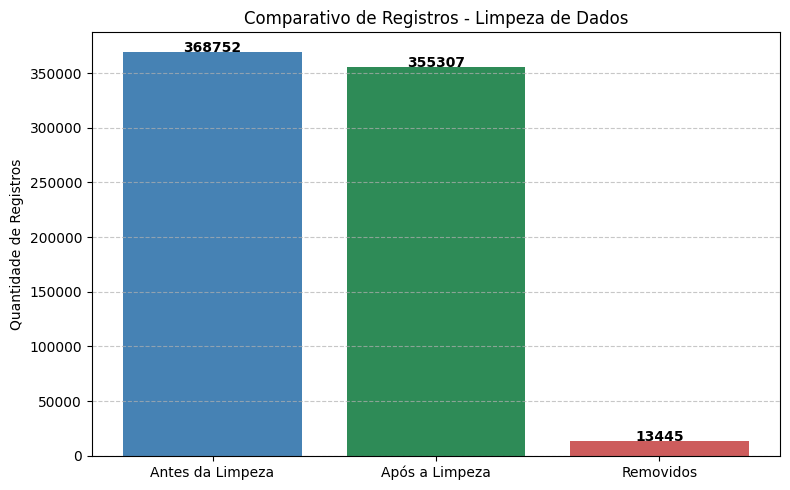

In [396]:
etapas = ['Antes da Limpeza', 'Após a Limpeza', 'Removidos']
quantidades = [registros_original, registros_corrigido, removidos]

plt.figure(figsize=(8, 5))
plt.bar(etapas, quantidades, color=['steelblue', 'seagreen', 'indianred'])
plt.title('Comparativo de Registros - Limpeza de Dados')
plt.ylabel('Quantidade de Registros')
for i, v in enumerate(quantidades):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()